In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Piste si time : 
- Résoudre problème glass
- Data Augmentaiton dans pytorch
- Baisser la taille du batch 
- Changer les paramètres split dataset
- Augmenter nb epoch
- Essayer autre optimizer SDG


In [5]:
import torch
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import random,os,glob
from torch.utils.data import random_split
import torchvision



# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


Let start with image reshape with Background

In [6]:
data_dir  = "/gdrive/MyDrive/M2/4.AI/Pre_processing/Image_Resized_With_BG"

In [ ]:
#/Users/edgarjullien/Documents/ecole/tbs/U4_IA/Deep_learning/U4-Deep-Learning-for-Business/Pre_processing/Image_Resized_Combination

In [9]:
img_list = glob.glob(os.path.join(data_dir, '*/*.jpg'))

In [10]:
len(img_list)

2527

In [11]:
classes = os.listdir(data_dir)
print(classes)

['metal', 'plastic', 'cardboard', 'paper', 'trash', 'glass']


Transformation

Maybe add Normalization tranform

In [12]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

#transformations = transforms.Compose([transforms.Resize((300, 300)), transforms.ToTensor()])
transformations = transforms.Compose([transforms.Resize((300, 300)), transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])


dataset = ImageFolder(data_dir,transform=transformations)

#dataset = ImageFolder(data_dir,transform=transforms.ToTensor())

In [13]:
len(dataset)

2527

In [11]:
dataset[0]

(tensor([[[ 1.9920,  2.0263,  2.0434,  ...,  1.5468,  1.5468,  1.5810],
          [ 2.0263,  2.0434,  2.0605,  ...,  1.5810,  1.5639,  1.5810],
          [ 2.0605,  2.0777,  2.0948,  ...,  1.6153,  1.5982,  1.5639],
          ...,
          [ 1.1187,  1.1187,  1.0502,  ..., -0.1657, -0.1486, -0.1486],
          [ 1.0844,  1.0844,  1.0502,  ..., -0.1486, -0.1486, -0.1657],
          [ 1.0673,  1.0159,  0.9817,  ..., -0.1486, -0.1486, -0.1828]],
 
         [[ 1.4657,  1.5007,  1.5182,  ...,  0.9405,  0.9405,  0.9755],
          [ 1.5007,  1.5182,  1.5357,  ...,  0.9755,  0.9580,  0.9755],
          [ 1.5357,  1.5532,  1.5707,  ...,  1.0105,  0.9930,  0.9580],
          ...,
          [ 0.5903,  0.6078,  0.5553,  ..., -0.4776, -0.4601, -0.4601],
          [ 0.5553,  0.5553,  0.5553,  ..., -0.4601, -0.4601, -0.4776],
          [ 0.5378,  0.4853,  0.4853,  ..., -0.4601, -0.4601, -0.4951]],
 
         [[ 1.0714,  1.1062,  1.1237,  ...,  0.6531,  0.6531,  0.6879],
          [ 1.1062,  1.1237,

In [ ]:
#(dataset[0][0])

create a helper function to see the image and its corresponding label:


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: plastic (Class No: 4)


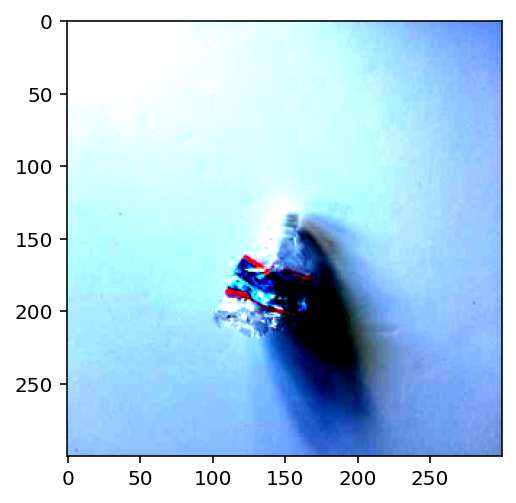

In [15]:
img, label = dataset[2000]
show_sample(img, label)

Loading and Splitting Data:


In [16]:
random_seed = 42
torch.manual_seed(random_seed)



We'll split the dataset into training, validation and test sets:


In [17]:
train_ds, val_ds, test_ds = random_split(dataset, [1593, 176, 758])
len(train_ds), len(val_ds), len(test_ds)

(1593, 176, 758)

In [ ]:
#train_ds, test_ds = random_split(dataset, [1860, 667])
#len(train_ds), len(test_ds)

In [18]:
from torch.utils.data.dataloader import DataLoader
batch_size = 16



Now, we'll create training and validation dataloaders using DataLoader.


In [19]:
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)

In [ ]:
#train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
#test_dl = DataLoader(test_ds, batch_size, num_workers = 2, pin_memory = True)



This is a helper function to visualize batches:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


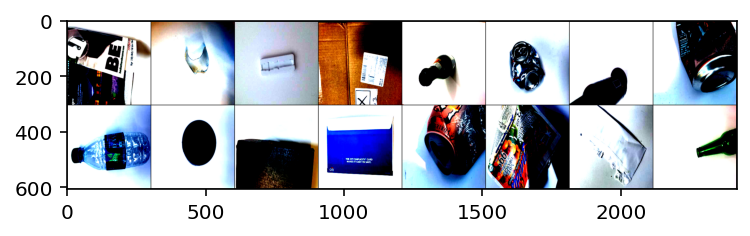

paper plastic trash metal


In [20]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dl)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


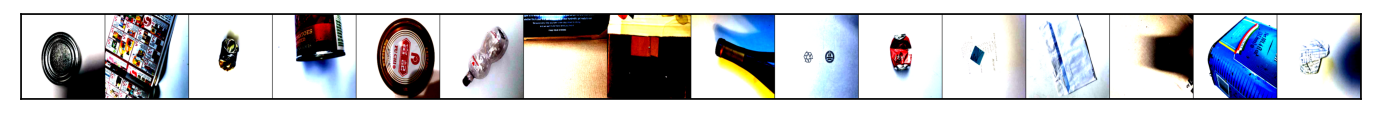

In [22]:
show_batch(train_dl)

## Model 1

In [23]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

CNN

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class Net(ImageClassificationBase):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2,2)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc1 = nn.Linear(16 * 72 * 72, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #x = x.view(-1, 16 * 5 * 5)
        x = x.view(-1, 16 * 72 * 72)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

In [25]:
def get_default_device():
    
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [26]:
device = get_default_device()
device

device(type='cuda')

In [27]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)


In [28]:
to_device(model, device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=82944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=6, bias=True)
)

In [26]:
def get_size_linear(): 
    for i, data in enumerate(train_dl, 0):
        if (i < 1):
            inputs, labels = data
            
    print(inputs.shape)
    
    conv1 = nn.Conv2d(3, 6, 5)
    x = conv1(inputs)
    print(x.shape)
    
    pool = nn.MaxPool2d(2,2)
    x = pool(x)
    print(x.shape)
    
    conv2 = nn.Conv2d(6, 16, 5)
    x = conv2(x)
    print(x.shape)
    
    pool = nn.MaxPool2d(2,2)
    x = pool(x)
    print(x.shape)


In [ ]:
#get_size_linear()

Other Loss function definition

import torch.optim as optim  

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Training the Model:

fitting the model

In [29]:
 
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [28]:
evaluate(model, val_dl)

{'val_acc': 0.1927083283662796, 'val_loss': 1.7915815114974976}

Train

In [32]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch 1: train_loss: 1.4000, val_loss: 1.2053, val_acc: 0.8438


KeyboardInterrupt: ignored

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

Max ... accuracy with first manualy model. let us use Resent 50 for classifying image

## Model 2



We'll be using ResNet50 for classifying images:


6

In [30]:
class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()



Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [31]:
to_device(model, device)


ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [32]:
evaluate(model, val_dl)

{'val_acc': 0.234375, 'val_loss': 1.7822602987289429}

Train

In [33]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)


Epoch 1: train_loss: 1.3962, val_loss: 1.2126, val_acc: 0.8698
Epoch 2: train_loss: 1.1628, val_loss: 1.1389, val_acc: 0.9323
Epoch 3: train_loss: 1.1122, val_loss: 1.1190, val_acc: 0.9531
Epoch 4: train_loss: 1.0850, val_loss: 1.1044, val_acc: 0.9427
Epoch 5: train_loss: 1.0719, val_loss: 1.0917, val_acc: 0.9635
Epoch 6: train_loss: 1.0784, val_loss: 1.0985, val_acc: 0.9740
Epoch 7: train_loss: 1.0693, val_loss: 1.0871, val_acc: 0.9688
Epoch 8: train_loss: 1.0698, val_loss: 1.1092, val_acc: 0.9427


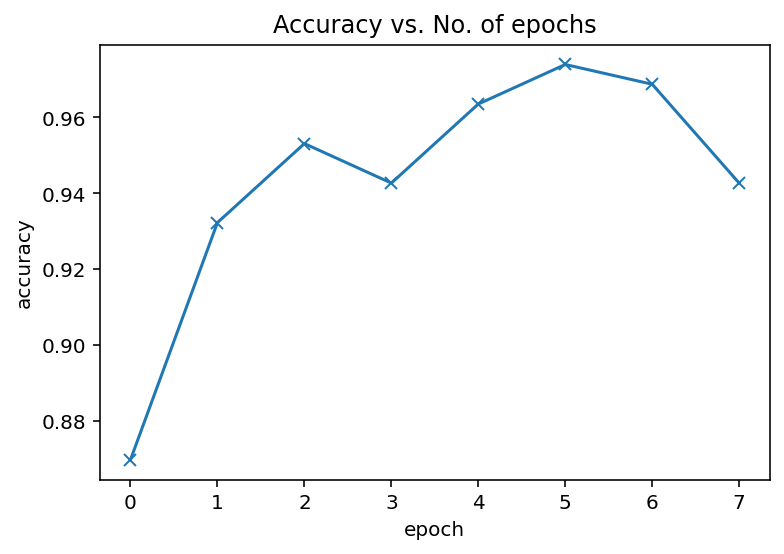

In [34]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

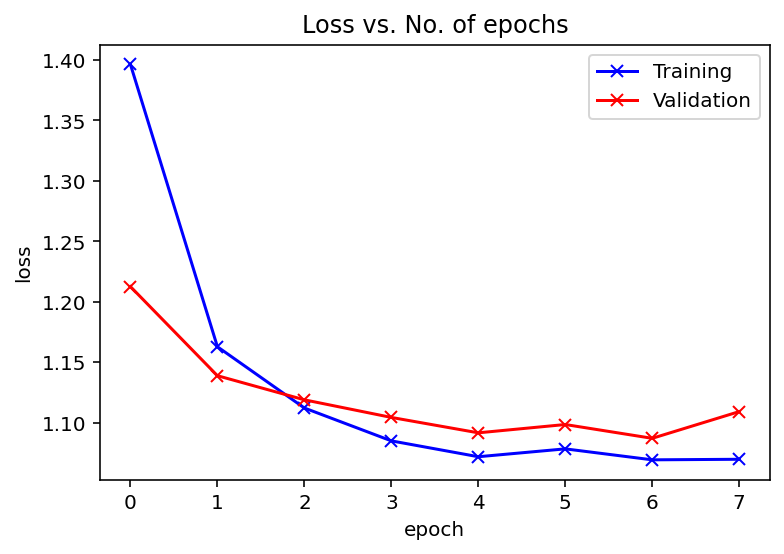

In [35]:

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)



In [1]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
 
    test_loss /= len(test_loader.dataset)
 
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
	def main():
 
    device =  "cpu"
 
    train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)
    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 
    for epoch in range(0, 10):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
 
 
    torch.save(model.state_dict(),"output/model.pt")
 
        
if __name__ == '__main__':
    main()        

### Visualization Prediction 

Accuracy

In [36]:
test_dl = DataLoader(test_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
test_dl = DeviceDataLoader(test_dl, device)


In [ ]:
torch.save({"state_dict": model.state_dict()}, "/gdrive/MyDrive/M2/4.AI/Pre_processing/cnn2.pth")

In [ ]:
model

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [37]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dl:
        images, labels = data
        #print(labels)
    
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if (predicted == labels):
            #class_correct[data] += 1
    
     
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 90 %


In [38]:
class_correct = list(0. for i in range(6))
class_total = list(0. for i in range(6))
with torch.no_grad():
    for data in test_dl:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(6):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of metal : 90 %
Accuracy of plastic : 91 %
Accuracy of cardboard : 90 %
Accuracy of paper : 95 %
Accuracy of trash : 77 %
Accuracy of glass : 75 %


In [39]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return [preds[0].item()]

SyntaxError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: metal , Predicted: [tensor([2], device='cuda:0'), tensor([[7.8941e-05, 8.5516e-05, 9.9999e-01, 2.1646e-04, 1.2436e-04, 4.3329e-05]],
       device='cuda:0', grad_fn=<SigmoidBackward>)]


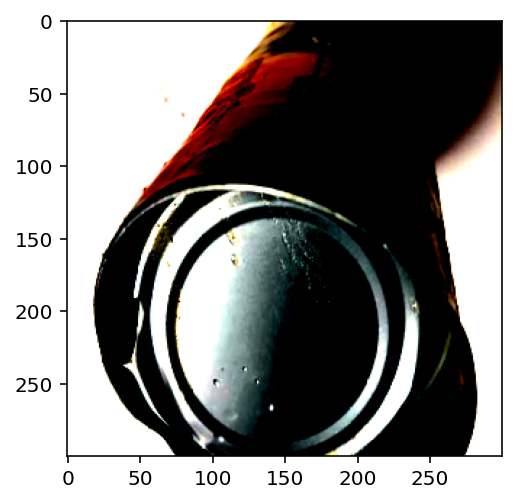

In [59]:
img, label = test_ds[17]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: glass , Predicted: [1]


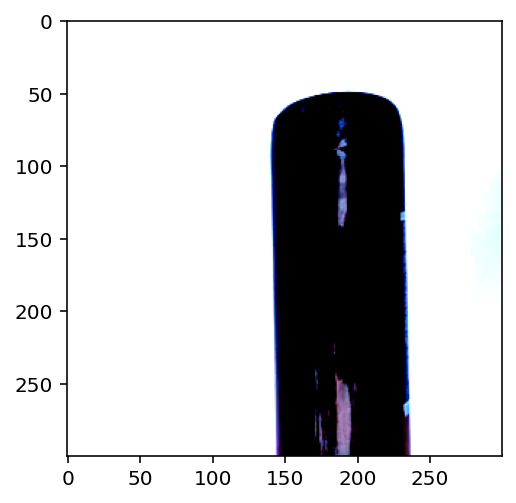

In [40]:
img, label = test_ds[23]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: plastic , Predicted: [4]


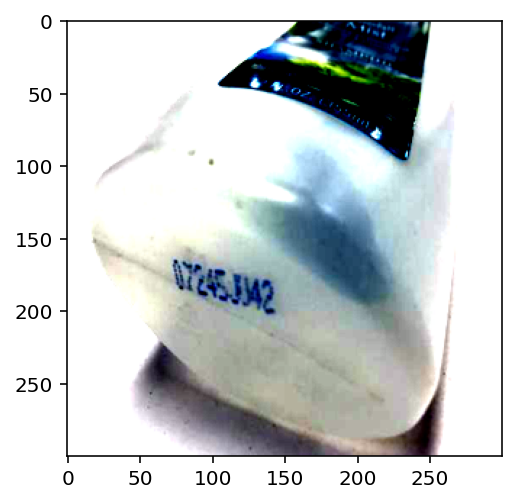

In [44]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))


Predicting External Images:


In [ ]:


import urllib.request
urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fengage.vic.gov.au%2Fapplication%2Ffiles%2F1415%2F0596%2F9236%2FDSC_0026.JPG&f=1&nofb=1", "plastic.jpg")

urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fi.ebayimg.com%2Fimages%2Fi%2F291536274730-0-1%2Fs-l1000.jpg&f=1&nofb=1", "cardboard.jpg")    

urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.2F0uH6BguQMctAYEJ-s-1gHaHb%26pid%3DApi&f=1", "cans.jpg") 

urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftinytrashcan.com%2Fwp-content%2Fuploads%2F2018%2F08%2Ftiny-trash-can-bulk-wine-bottle.jpg&f=1&nofb=1", "wine-trash.jpg")

urllib.request.urlretrieve("http://ourauckland.aucklandcouncil.govt.nz/media/7418/38-94320.jpg", "paper-trash.jpg")

urllib.request.urlretrieve("https://programmingaltanai.files.wordpress.com/2020/09/1.jpg?w=616", "mixed-trash.jpg")






('mixed-trash.jpg', <http.client.HTTPMessage at 0x7f329e1d9f60>)

In [ ]:
urllib.request.urlretrieve("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAPDxAPDxAPDw8ODw8PDw8PEA8PDQ0OFREWFhURFRUYHSggGBolHRUWITEhJSkrLi4uFx8zODMsNygtLi0BCgoKDQ0NDw8PDysZFRkrNy0rKy0rLSs3Nys3LSstKzc3NzctKy03Kzc3Ky0rLSsrKysrKysrKysrKysrLSsrK//AABEIAI0BZgMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQMEBQYHAgj/xAA9EAABAwIDBQYEBAUDBQEAAAABAAIDBBEFEiEGMUFRYRNCcYGRoSIyUrEHFGLBIzNy0fCCouE0Q1OSshX/xAAWAQEBAQAAAAAAAAAAAAAAAAAAAQL/xAAXEQEBAQEAAAAAAAAAAAAAAAAAEQEh/9oADAMBAAIRAxEAPwDsiEIWgIQhAIQhAIQhAIQlQIhCEAhCVAiEIQCEEpLoFQmpJMu+w8SAobsWiBsXeliPZBYoTEVQ1wu1wcOhToKD0hCEAhCEAhCEAhCVAiVIhAIQlQIhCEAhCEAhCEAlSJUCISoQIhCEAlQhAiEqECISoQCEiVAiEJUCIQlQCEip8Yxnsz2UXxSnTTUt8OqCfWV8cXzH4juaNXHyVe3Gs5s1rnH6WDM7zPBUxo3ZgahxzyaiFhvI7q93AK4pmiNtgGt8NyCSySd3djiH6jnf6DT3SvjPfle7oCI2+g191W12LsiGpWeq9qb6NHmSiNTI2IcATzIzH/ddRJqho3Et/pIb9llf/wBh797vRL+aJ4n1SCzqax3CR/8A7uKZhxWZhu2R3gTcHyKrnSLzmVHQMDxUVDTezZG/MBuI+oK0XOsHrTDMx/dvZ/Vh3/38l0NjrqK9oQhAISXTFTWMi+Y68GjVx8kEhJdU0+NO7kdhzef2Czm0+1s1NADGBJUVBdHTRNFgSPmkd+lqDXYni9PStz1E0ULecjw1Z1/4lYWDYVBd1bG8j1suVSbN1FU8z1s75ZXG51Ja3o2+4eFlIGybRuViV1mk25w6XQVLGn9YLPur6mq45ReN7HjmxwcPZcEl2fe35U1C6opnZo3SRkd6Nzh62SFfQ6FyjAfxImjs2qaJmbs4s2UfsfZdIwjF4KtmeB4cOI3OaeRHBSKnoQhAIQhAIQhAIQhAiEqRAqEIQCEIQCEIQCEIQCEIQCEIQQMYqzFH8P8AMkORnQ81DoaRtOwyHWQguc87/JRn1XbVR4siu1nK99XKbiGsTx+k/ZEVeCgyl87t73EDo0JcVrBG0klO7P8A/StPj9ys5tYT7IMxj2NFzrAqpiqySqyslOcg8CU9QuuVoaGkcSrWFV1BCTZXVPToGyvN1JnisoxUQ7Gt3s5V9pA2/wA0fwO8tx9LeiwlLq4eK1mE/wACZo3MqG5egkGo9dR5pq40wckLl4UHFq8QMv33ktjHXi7wH9uaikxHEsp7NhAd3ncGD+6rjWQx3JOZx1JJuSVm2snqJHFl8tyL63dzKsI9mZHD4z7ohKvGWyHKz2VdWUuacuIuY2Nhb+kAXcB4uJ9ByU+PAewmjvqHva31Tzorveeckh/3lUVYp0vYqz7FeTEgq3Q++5LLDTtbeWMOHMvc0+Vk6XDNm/0sA3kX3gdf2Wex6eSJzpZQ4xje1o0jaOXPmSgk0uHGR0klHAyzb6yuBke3iGAg3tx08+CYp8UEErTk/Ly3s2SNrYw7XcQ34HeBFzzC0eDzsfFFLA4ZcrTG5vIBLtDhMc1zlFpWB9rfK46O9wUGm2d2gZUjI4hswFyB8sjfqb+44ehN4uGOnlpNWuIlpXgtdxLdN/MFp152XXNmsaZW07Zm6O3Pb9DxvH+c1NFuhAQihCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBNVUmWN7vpY93o0lOrxNHna5h77XN9QR+6DCbO1F37/mC1UzbtI5hc8wSoMcmR2jo3ljhyc02I9l0SM3aDzCairwM2p3N4se9p9f+VVYxTdq026q3o25ZKqPnaVvgRY/ZVOHyl5c09UHJcfpzFUPafEdQpWBwZiOqsdsKQyVbA0fESGHwJJB9itps5swyNocRchaEXDqA2Git4aWytPywbwStjWRS4jT2bdU7wtbiEAMZ6BZgU8kjXmNpcW8BvVDdF848VpI6psrn018skYa+M/qtcEeawdBjbI3uEoLS124jU66q7xd1pIcQpXCSNxbmc03yvAAyu5X5FB0CmrWuh7Z5DA1pMpOgjLfnv4LJNqnVkxlIIa/4IWHeyLmep3nyHBV+I4n+bcY4SRTOySVA3CWcb2j9I0vzIHJXGAx/wAQfpCg1FFStjYGtAAA9U+m3Psm+1RUTFxrAeU7PsVXhmrv63//AEVYYqbxZvofG70cP7qIG/E/+q/qB+90REmB4LP4jVvs5w/lsvc8Hkb7dFoq4XswHLnJzO3ZIwLud6fdcA212qfXVDhG5zKSI5IImktaWjTtHAb3G1+mgQdaw3EO0YJtM0lwy+5jL2zeJ18vFTXREi0l3AjXUgEeAWT2Sm7bD4Sx2XLCIXOHcLRlJPhvV/hjJ4Y8tSHfAA0yklzXk/K8HkVRUTxy4VIZaRhlpZCXzUoOrDcXki5HUXbuPktE3ailliY8OcMrSMpaQ+9ydeSiTSZzza0OF+FzbT2905hWzcTX9tILuOrYzbI3q4cT7IKfEsLkqY55xdnai7ARq9oAtpwbYDxSfhZjJhqBE42jnGWx4PG79x6LbzR3BC5lTwmCulDdOyqLjwIEg9yUHfGlelGopczGO5tB9lJCihCEIBCEIBCEIBCEIBCEiBUJEIBCEIBCRF0CoSXSXQc526w11LVCsYD2FS4NltuiqOZ5BwHrfmFqNnqntYGneRoVcVdOyaN8UrQ+ORpa9jtQ5p4LL4PTGhqjSlxdFI3PA5xu5zRvaTxI3eY5oi1mjyzxv4PDoXeerfcLKRydlUOB4PcPcrczw5m246EHk4G4Kw+08JbUuI0Dw148SNfcIK7GXugqWVLGtkygtfG7dJGdSL8CLAgrVbKVMUkbnRSZmk3yP0liOt2nn4qopaEzAX4BQZaB9JMCy4DuWguOH+clRq67E2MJA1+yhDGRfcocNZE7VwseIKn00tMd9lA9+dEjcoG9TcGoezBJ3uN17pWw9zL7KaXgC6CFiWBU1Q0iWFjie9azh5hc4qcIEFU+KkmkDbFtRlPw5SP5Z5n7LXY1tI5+ampD8fyy1HdgHFrOcnsPFVFLStjblaOpJ1JPEk8SqPNPA2Noa0WAFgr3AxZ11VEWUygqA0oNJPJZQfzmq8VVRdt1RyVOqg0czs8b2/Uw28baKLSS5rO+pgPmN/3UKlrtLFM4TUjO5n0uNv6b6D3ugi7dVRhoa+Vps5lHkaeIMr8hK+cl9J7ZUBqKOshaLumpHZBzkjdnAXzVmRWj2P2pkw6UnL2kDyO0ivY33Z2ngbeq63g+2WDTADtnRF1h2MnbsaS4/LkHwnyXAsyA43Fr3uLW334WSj6oEcbm3ZHkazRt25SXHjbhxStbZOU4IgizfM5rXO8coH3uvF0R5cFhBT9piNZbuyUw8zHqt09yzOxsPbuq6rhPVuyHmyMZQfZUdDwcWhjHJoCsAoeHNtG0dP3UxRQhCEAhCEAhCEAkSoQIhCEAhCRAIQkKAuvJKCvDig9Fy8F6ae9RJ5iEEx0wHFVOPZXxhzSBNA7tYj+ob2f6hp6KBiFc5oKx2NYzJrYlEdUo6pssTJW7ntB/4VbtBh4mbmbbPG29uOUrA7HbVvDZIHON488jG/VGbF3oRfwPQq0dtG+GoEhIdG9ljfUFpSCbheKNiu13BNYpijJAQT1B4gjcVkMWxMPkc6PQE7gq19U48VYL2rxBuvA/5qOigOxQjcVVvkvvK901LJMbRMc89BoPEqosW47K3c4+qtsOrKyqbYvdHCdC/c9w5N5eKMG2T1Dp/jI1yD5B4nitPaKEakEjc0bgoqLSULWNDWjK0L3K9rVHqsUvoNAq2WrvxQTJZ00KixVe+qTJqkGiZXEtsUw5yqIqtSBUoJplsosdZ2czX8Cfi+x9vsmX1CgVklxpv3jxVG/hqO1ZmZbtInkEfrG8eBaQR0cFw38S9lTR1BqYWn8nUuLmEA2glOronctbkdPBbrD8f/L5al1zCMkFa0XJjZf+FUgfpJLXdCOQWwqoIp43Nc1k0MzfiYbOjkadzh91ncHzAtb+G2zb6+ujOU9hTvZJK7gSDdsfmR6XW/k/CegkkzMfVMaTfsg+MhvQFzSQPG62mGUFPh8IgpmNZb6dbX3uLt7nHmVIqwq5Rew3NAaPL/lRS9MGVNTVDWNL3uDWtBc5xNmtA3kqohbU4kYKZ2T+bL/CiA3l7uPkLnyV1s5hYpaWGADVjBfq92p9yqPBcPdWTNrp2lsEd/y0btCWf+Qjm7Q+AC3FEzM4HgLOPj3R+/kEFhCzKAOQA9E4vN0t0UqEl0IFQkQgVCRCBUIQgEiVCBEJUiBEhC9IQeCF4LU7ZJZBHcxRpae6sC1IWoM7W4bmBWTxjZ92pAuumGMJiWlB4IjgGJUUsDxIwuY9hu1wuHNI4qBU7VOH86BryN5Y90VzzyjT0su4YxszHMDprzXMdpfw9lBJjFx0Voz9LtZTX1pGuP655PtZXdJtdRH56JjerS1/3Cw9fs1PETdh06FVT6aVn1D1QdkpdosOOoijaerGg/ZWA2op2j4Gt9bD0C4SKiRvE+acbiMg4pwdoqdrc2gcAOQ0VbLjoPFctGKv6pxuLu6pcHRX4vfimnYlfisG3F+qdbi3VUbM1/VefznVZRuJjmnW4h1QallZ1UyKr6rIR13VTIK/qg0xqExLMq1lXdD6hEPRVvYyXIDo3gtkYflc06EHxVth9dLhoHZh1Vhr/iaG6z0YO/KO82/DgsvUyggowzG+x/hSl/ZE/DIw2lgd9TT9wdDxRXU8OxmGpZnp5myNO8A2c3o5p1B8VILlzGspWm0zoopWu+WrpnPp3H+otuA7oQEQsLtBJVW5PrZXN9AAT6qQdAxHF4KcfxZAHH5Y2/FK7wYNV5wnDZcQe2Wqb2NIwh0dMT8czgbh8pHD9O7x3rO4NSwQnNaPOTcneSefEk+JK29NXtjaHSkguHwR7pZBzAPyt6n3QXEwzkMaLRtOUAado76RyHXgFb04DW2vc7yd1z/b9lnqStucxte1gB8rG/SP3O8+ws4qm6gtA9KHKGyVOteipF0t00HL0CgcQvIKVB6QkQg9IQhAIQhAIQhAJEqECISoQJZJZKhAlkll6Qg8FqZlpwd4UhCCjrsCikHxMB8ll8U2ChfezbLoZC8OYg4fin4bnXKFlq/YaZm5p9F9JSU4PBRJsOY7gFaj5eqNm5m90+igyYVIO6V9OVOz8Tt7B6Knq9kInd0JwfObqR44FNmE8iu71ew8Z3BUtVsJyCkwcgylKHO5ldHqtiHDuqqqNkHjulWDINqHDinmV7gribZqQcCocmByjun0Tqlp8XtvU9mIhw3qnfhcg7pTf5GUbgU6i7fVXUSaW6hCnm5FL+WmPA+iol0OJz0zs0ErmX3t0dG4ci06FWsW15P8ykpJHfU0SRX8Qw2VC3DpDwKn0mByuOjD6INBTbWzf9iOnpv1RR5pfJ77keSscNrXudmc5znONy5xLnOPUlRMK2Qnfb4CPIrbYRsU8WLtED+FVJNlpqRxKKDAWxgK3hpGt4LIbhBUtjV6bGnQECNC9gIAXoIoASoSoAIQhB6QhCAQhCAQhCAQhCAQhCAQhCAskSoQIhKkQCSyVCDwQvJanEWQMuYm3RKTZIQggvpwmX0YPBWRC8lqCmkw1p4KLJg7T3QtCWpCwIjKS7PsPdHoocuy8Z7oW1MYXkxhBg5NkYz3Uw7Yxh7o9F0Lsgl7EJRzobEs5eyei2Gi4hdAEQXsRhKMbTbFwN3sCt6XZ+Fm5jfRXoalDUEKKja3cAPJPtiT9koCKaDF7DV7slsg8hqWy9WQgSy9WQlQIlQhAISpEH//2Q==","metal.jpg")

urllib.request.urlretrieve("https://static1.terrafemina.com/articles/6/34/67/56/@/513496-les-alternatives-aux-bouteilles-en-plast-953x0-2.jpg","plastic.jpg")




('plastic.jpg', <http.client.HTTPMessage at 0x7f329e165668>)

In [ ]:
urllib.request.urlretrieve("https://lh3.googleusercontent.com/proxy/5U7jfpqb8Fd7fSjLu803VffSvUp9mc81OBv36e59mSdXllBTZHBPZHna3OL51NBGVbGELHU_cy05fzlcdiJboQmIPDF-67UnaEB96TcwPhgAXPk1pe3z11jj4usgpVzbpEb5lLJ8L-4","papier.jpg")

HTTPError: ignored

In [ ]:
loaded_model = model



In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name):
    image = Image.open(Path('./' + image_name))

    example_image = transformations(image)
    plt.imshow(example_image.permute(1, 2, 0))
    print("The image resembles", predict_image(example_image, loaded_model) + ".")

In [ ]:
predict_external_image('plastic.jpg')

In [ ]:
predict_external_image('cardboard.jpg')

In [ ]:
predict_external_image('metal.jpg')

In [ ]:
predict_external_image('verre.jpg')

In [ ]:
predict_external_image('plastic.jpg')

In [ ]:
predict_external_image('papier.jpg')